<img src="logosimbolo1.gif" width="180" height="180" align="left"/>

<img src="logo.svg" width="200" height="460" align="right"/>

<font color='orange' size=6 align='center'><p style='text-align: center;'>**Curso Precongreso (1-CICB): Python en Ciencias Biomédicas**\
<font color=cian size=5>**Enrique Mejía Ospino, emejia@uis.edu.co**\
<font color=cian size=5>         **Universidad Industrial de Santander**

<font color=magenta size=6>**Visualización**

---

<font color='SteelBlue' size=4><p style='text-align: justify;'>**Una e las etapas más importantes en el anális de datos de cualquier tipo, es la visulización de dicho datos y/o de los resultados del análisis. Existen en Python varias bibliotecas para visualizar datos y resultados, quizás la más importante es `Matplotlib`.  En esta sesión veremos algunos ejemplos del uso de éste y otros modulos que cumplen como ninguna plataforma el objetivo de visualizar de la mejor manera los resultados de una investigación.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

<font color='SteelBlue' size=4><p style='text-align: justify;'>**Leemos los datos que han sido guardados en el formato de excel utilizando el modulo `pandas` hacemos una inspección**

In [2]:
data = pd.read_excel('https://github.com/emejiao/Mass_Spectra3/blob/master/Z_Potentials_GSO.xlsx?raw=true', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-149.0,-149.0,-148.0,-149.0,-148.0,-147.0,-148.0,-150.0,-147.0,-150.0,-150.0,-150.0
1,-146.0,-145.0,-144.0,-146.0,-145.0,-144.0,-145.0,-146.0,-143.0,-146.0,-146.0,-146.0
2,-142.0,-142.0,-141.0,-142.0,-141.0,-140.0,-141.0,-143.0,-140.0,-143.0,-142.0,-143.0
3,-138.0,-138.0,-137.0,-139.0,-138.0,-136.0,-138.0,-139.0,-136.0,-139.0,-139.0,-139.0
4,-135.0,-135.0,-134.0,-135.0,-134.0,-133.0,-134.0,-136.0,-132.0,-136.0,-135.0,-136.0


In [3]:
Z_Potential = data[0:82]
Intensity = data[84:166]
Intensity.shape, Z_Potential.shape

((82, 12), (82, 12))

<font color='navy' size=4><p style='text-align: justify;'>**En el ejemplo de abajo se ha utilizado el modulo de `matplotlib`para visualizar varias curvas sobre los mismos ejes y en la misma escala, adicionalmente, se han utilizado varios argumentos que enriquecen las gráficas. Si desea tener más información visite la pagina de documentación de matplotlib [aquí](https://matplotlib.org/)**

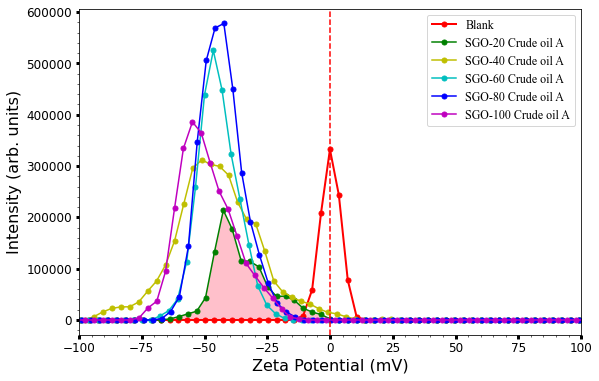

In [4]:
fig, ax = plt.subplots(figsize=(9,6))
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
plt.rcParams["font.family"] = 'Times New Roman'
ax.plot(Z_Potential[0], Intensity[0], 'r-o', label='Blank', markersize=5, lw=2)
ax.plot(Z_Potential[1], Intensity[1], 'g-o', label='SGO-20 Crude oil A', markersize=5)
plt.fill(Z_Potential[1], Intensity[1], 'pink')
ax.plot(Z_Potential[2], Intensity[2], 'y-o', label='SGO-40 Crude oil A', markersize=5)
ax.plot(Z_Potential[3], Intensity[3], 'c-o', label='SGO-60 Crude oil A', markersize=5)
ax.plot(Z_Potential[4], Intensity[4], 'b-o', label='SGO-80 Crude oil A', markersize=5)
ax.plot(Z_Potential[5], Intensity[5], 'm-o', label='SGO-100 Crude oil A', markersize=5)
ax.legend(loc='best', fontsize=12)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(20000))
ax.tick_params(axis='both', labelsize=12, width=3)
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.set_xlim(-100, 100)
plt.axvline(x = 0, color = 'red', linestyle='--', label='Average')
#ax.set_ylim(500, 5000)
ax.set_xlabel('Zeta Potential (mV)',  fontsize=16)
ax.set_ylabel('Intensity (arb. units)', fontsize=16)
fig.savefig("Z_Pot.tif", dpi=200)
plt.show()

<font color='SteelBlue' size=4><p style='text-align: justify;'>**Aquí graficamos dos curvas en ejes y escalas diferentes**

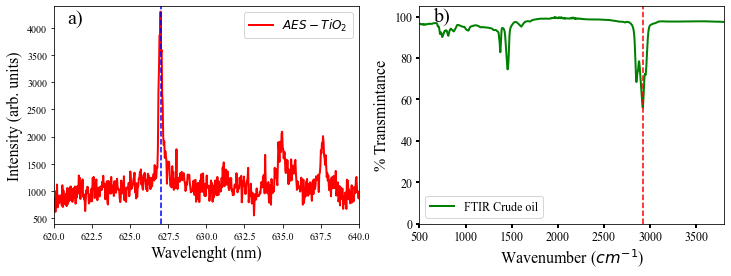

In [5]:
tio = np.loadtxt('https://github.com/emejiao/Mass_Spectra3/raw/master/tio88_1.txt')
ir = np.loadtxt('https://github.com/emejiao/Mass_Spectra3/raw/master/cinco.CSV', delimiter=',')
fig, ax = plt.subplots(1,2, figsize=(12,4))
lo = tio[:, 0]
In = tio[:, 2]
wn = ir[:, 0]
t = ir[:,1]
#%matplotlib jupyter notebook
#Gráfica uno
plt.rcParams["font.family"] = 'Times New Roman'
ax[0].plot(lo, In, 'r', label='$AES-TiO_2$', markersize=5, lw=2)
ax[0].legend(loc='best', fontsize=12)
ax[0].set_xlim(620, 640)
ax[0].set_ylim(400, np.max(In)+100)
ax[0].axvline(x = lo[np.where(In==np.max(In))], color = 'blue', linestyle='--') # Pone una línea punteada y azul en el máximo
ax[0].text(np.min(lo)+10, np.max(In)-200, 'a)', fontsize=20, color="black")
ax[0].set_xlabel('Wavelenght (nm)',  fontsize=16)
ax[0].set_ylabel('Intensity (arb. units)', fontsize=16)

# Gráfica dos
ax[1].plot(wn, t, 'g', label='FTIR Crude oil', lw=2)
ax[1].tick_params(labelsize=12, labelcolor='k', width=2)
ax[1].legend(loc='best', fontsize=12) # puede usar otro ubicación poniendo un número 0 ('best'), 1, 2, ...
ax[1].set_xlim(500, 3800)
ax[1].set_ylim(0, 105)
ax[1].axvline(x = wn[np.where(t==np.min(t[10:]))], color = 'red', linestyle='--')
ax[1].text(np.min(wn)+ 250, np.max(t)-2, 'b)', fontsize=20, color="black") # 
ax[1].set_xlabel('Wavenumber ($cm^{-1}$)',  fontsize=16)
ax[1].set_ylabel('% Transmintance', fontsize=16)

fig.savefig("Two_spectra.jpg", dpi=200)
plt.show()

<font color='SteelBlue' size=5><p style='text-align: justify;'>**Barras**

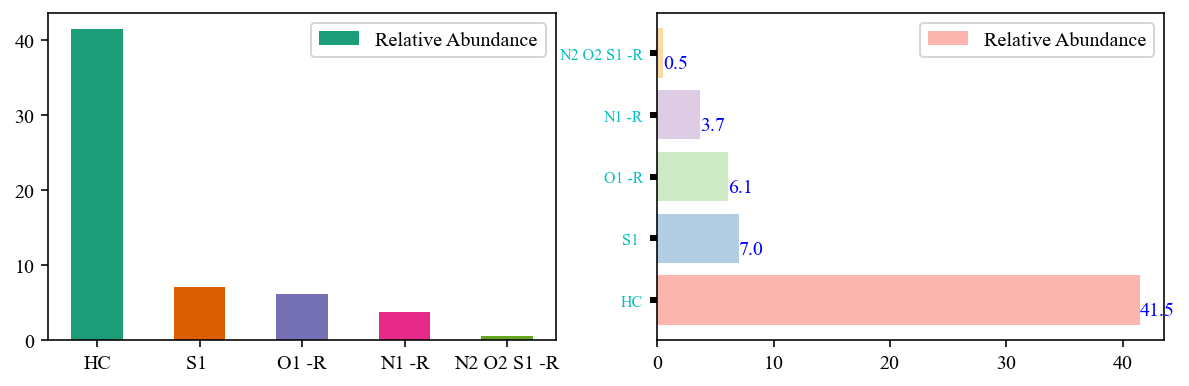

In [6]:
#Aquí leemos los datos de archivo excel ubicado como se indica aabajo
data_bar = pd.read_excel('https://github.com/emejiao/Mass_Spectra3/raw/master/AND1(APPI).xls',sheet_name='Combined R. Abundances',index_col='Class')

fig, ax = plt.subplots(1, 2, figsize=(10, 3), dpi=144, gridspec_kw=None)
plt.rcParams["font.family"] = 'Times New Roman'
colors = plt.cm.Dark2(range(10)) # Dark2, Pastel1, Paired, Accent, Pastel2, Set1, Set2, Set3, tab10, tab20, tab10b, estas son diferentes paletas de colores
anmss=data_bar.drop('Total', axis=0)
x = anmss.index
altura = anmss['R. Abundance']
ax[0].bar(x=x, height=altura, width=0.5, color=colors, label='Relative Abundance')
ax[0].legend(loc='best', fontsize=10)

colors1 = plt.cm.Pastel1(range(10)) # Dark2, Pastel1, Paired, Accent, Pastel2, Set1, Set2, Set3, tab10, tab20, tab10b
y = anmss.index
largo = anmss['R. Abundance']
ax[1].barh(y=y, width=largo, height=0.8, color=colors1, label='Relative Abundance')
ax[1].tick_params(axis='y', labelsize=8, labelcolor='c', width=3)
#ax[1].xaxis.set_minor_locator(MultipleLocator(5))
ax[1].legend(loc='best', fontsize=10)

for i, (valor, nombre) in enumerate(zip(largo, y)):
    #ax[1].text(valor, i, nombre, ha='left', size=10, color="red")
    ax[1].text(valor, i-.25, round(valor, 1), ha='left', size=10, color="blue")

<font color='red' size=4><p style='text-align: justify;'>**Otro modulo, muy utilizado en Python es el llamado `Bokeh`.  Este modulo permite hacer gráfica interactivas e incluso animadas que puedes ser utilizadas en presentaciones y páginas web. En el ejemplo de abajo se ha utilizado el modulo de `bokeh`para visualizar varias curvas y con la posibilidad de interactuar con ellas a través de múltiples herramientas. Si desea tener más información visite la pagina de documentación de bokeh [aquí](https://docs.bokeh.org/en/latest/index.html)**

In [50]:
from bokeh.io import output_notebook, show, output_file, export_png
from bokeh.plotting import figure, show
output_notebook()
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

# Draw a chart
p = figure(title='FTIR', plot_width=600, plot_height=400, x_range=(600, 4000), y_range=(0, 100),
           x_axis_label='Wavenumber (cm-1)', y_axis_label='% Transmitance', toolbar_location="above", tools=TOOLS)
p.grid.grid_line_alpha=0.3

p.line(wn, t, color='navy', legend_label='FTIR', line_width=2, alpha=1)
#p.ygrid.band_fill_color = "olive"
#p.ygrid.band_fill_alpha = 0.1
p.legend.location = "top_right"
p.grid.visible = True
p.title.align = "center"
p.title.text_font_size = "20px"
#p.legend.location = "top_center"

show(p)

Loading BokehJS ...

In [59]:
from bokeh.io import show
from bokeh.models import Panel, Tabs
from bokeh.plotting import figure

p1 = figure(title='FTIR', plot_width=600, plot_height=400, x_range=(600, 4000), y_range=(0, 100),
           x_axis_label='Wavenumber (cm-1)', y_axis_label='% Transmitance', toolbar_location="above", tools=TOOLS)
p1.line(wn, t, color='navy', legend_label='FTIR', line_width=2, alpha=0.8)
tab1 = Panel(child=p1, title="FTIR")

p2 = figure(title='AES', plot_width=600, plot_height=400, x_range=(620, 640), y_range=(500, 5000),
           x_axis_label='Wavelength (nm)', y_axis_label='Intensity (arb. units)', toolbar_location="above", tools=TOOLS)
p2.line(lo, In, color='red', legend_label='AES-TiO', line_width=2, alpha=1)
tab2 = Panel(child=p2, title="Emission")

show(Tabs(tabs=[tab1, tab2]))